#  Europe Hotel Booking Satisfaction Score

Maulana Kavaldo | September 2022

<p><img alt="Insight logo" src="images/social-github.png" align="left" width="25px" height="25px"></p>
<span> &nbsp <a href="https://maulanakavaldo.github.io">Maulana Kavaldo</a> </span>

<p><img alt="Insight logo" src="images/sm-link.png" align="left" width="24px" height="24px"></p>
<span> &nbsp <a href="https://linkedin.com/in/maulana-kavaldo">Maulana Kavaldo</a> </span> 

<!-- <p><img alt="Insight logo" src="images/sm-ig.png" align="left" width="25px" height="25px"></p>
<span> &nbsp <a href="https://instagram.com/in/maulana-.kavaldo">maulana.kavaldo</a> </span>  -->

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/europe-hotel-satisfaction-score/Europe Hotel Booking Satisfaction Score.csv


# Description

## Problem background
1. Hotel DTS is a hotel located on the European continent.
2. This hotel has a problem with the ratio of customer satisfaction levels for hotel services provided, where the satisfaction level is still below 50%.
3. We want to understand the pattern of data from customers who are satisfied and who are neutral or dissatisfied with hotel services based on scoring.
4. With the pattern that has been obtained, we can identify service factors that affect customer satisfaction so that the hotel can improve its services, especially to customers who are potentially neutral or dissatisfied, so that these customers can finally be satisfied with the hotel's services.

## Destination
1. Increase customer satisfaction rating on hotel services.
2. Finding hidden patterns from customer data that are satisfied and neutral or dissatisfied with hotel services.
3. Predict the customer is satisfied or neutral / dissatisfied.

# Load dataset

In [2]:
df = pd.read_csv('/kaggle/input/europe-hotel-satisfaction-score/Europe Hotel Booking Satisfaction Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

# EDA (Exploratory Data Analyst)

## Check shape dataset

In [4]:
row = df.shape[0]
column = df.shape[1]
print(f"Number of rows = {row} \nNumber of columns = {column}")

Number of rows = 103904 
Number of columns = 17


## Check missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

## Unique data from each column

In [7]:
print("Number of unique labels from each column")
print("==="*16)
for x in df.columns:
    print(f"{x} : {len(df[x].unique())} labels")
    print(f"{x} : {df[x].unique()} \n")

Number of unique labels from each column
id : 103904 labels
id : [ 70172   5047 110028 ...  68825  54173  62567] 

Gender : 2 labels
Gender : ['Male' 'Female'] 

Age : 75 labels
Age : [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 

purpose_of_travel : 5 labels
purpose_of_travel : ['aviation' 'tourism' 'business' 'academic' 'personal'] 

Type of Travel : 2 labels
Type of Travel : ['Personal Travel' 'Group Travel'] 

Type Of Booking : 3 labels
Type Of Booking : ['Not defined' 'Group bookings' 'Individual/Couple'] 

Hotel wifi service : 6 labels
Hotel wifi service : [3 2 4 1 5 0] 

Departure/Arrival  convenience : 6 labels
Departure/Arrival  convenience : [4 2 5 3 1 0] 

Ease of Online booking : 6 labels
Ease of Online booking : [3 2 5 4 1 0] 

Hotel location : 6 labels
Hotel location : [1 3 2 5 4 0] 

Food 

In the Type Of Booking column there is data 'Not defined', then we have to check the distribution of the data

In [8]:
print(df['Type Of Booking'].value_counts())
print(df['Type Of Booking'].value_counts(normalize=True))

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


If seen, the amount of data that is not defined is 7494 or about 7.2%. Therefore we can filter or drop the data because the percentage is small

In [9]:
x_drop = df[df['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(x_drop)
df = df.reset_index(drop=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [10]:
df.shape

(96410, 17)

After filtering, the amount of data becomes 96,410 and this data will be used for the next stage.

## Check Duplicated

In [11]:
df["id"].duplicated().sum()

0

## Check data outliers

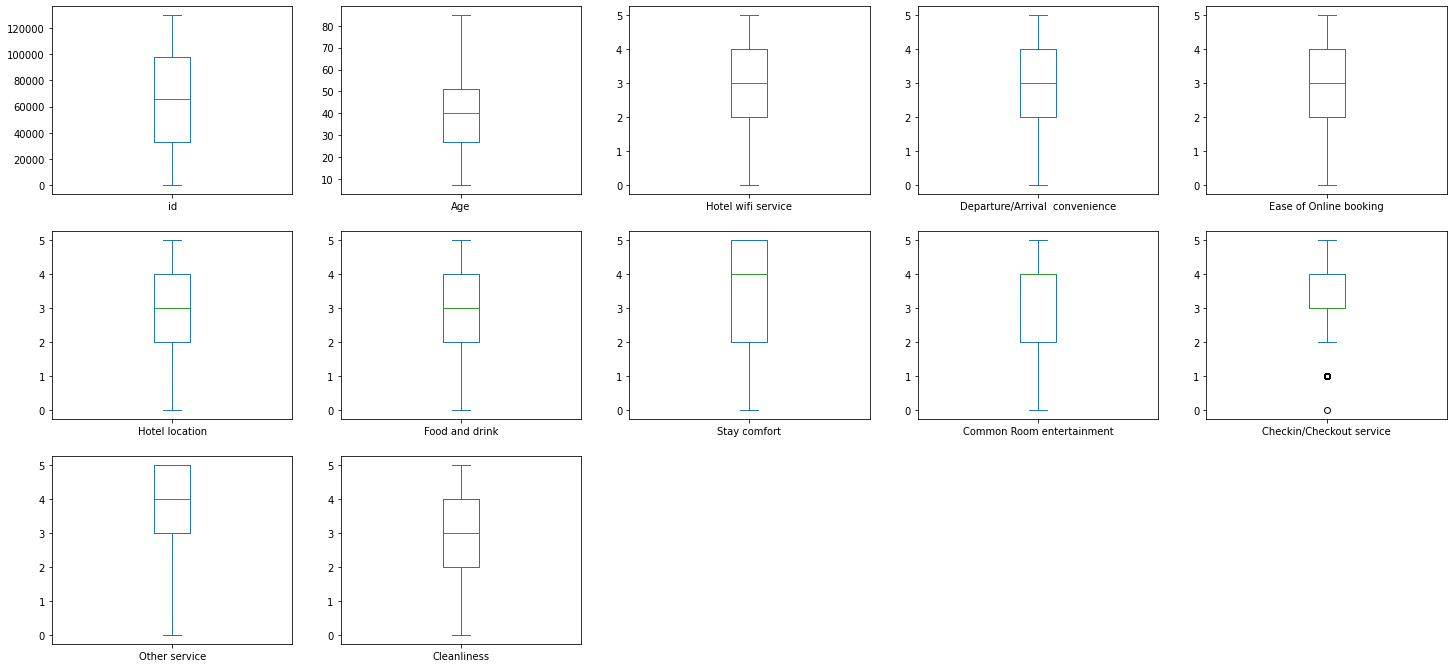

In [12]:
df.plot(kind = 'box', subplots=True, figsize=(25,20), layout = (5,5))
plt.show()

If we look at the visualization above, we will only find outliers in the checkin/checkout service data which are also small in number with a scale of 0-5. Therefore we can ignore the data outliers without the need to handle outliers

## View Distribution of target Label data

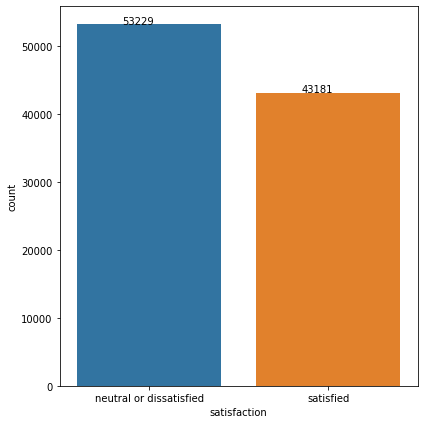

In [13]:
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="satisfaction", data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [14]:
df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.552111
satisfied                  0.447889
Name: satisfaction, dtype: float64

It can be seen that the distribution of the data is quite balanced with 53,229 dissatisfied and 43,181 satisfied data.

## Visualization of categorical data

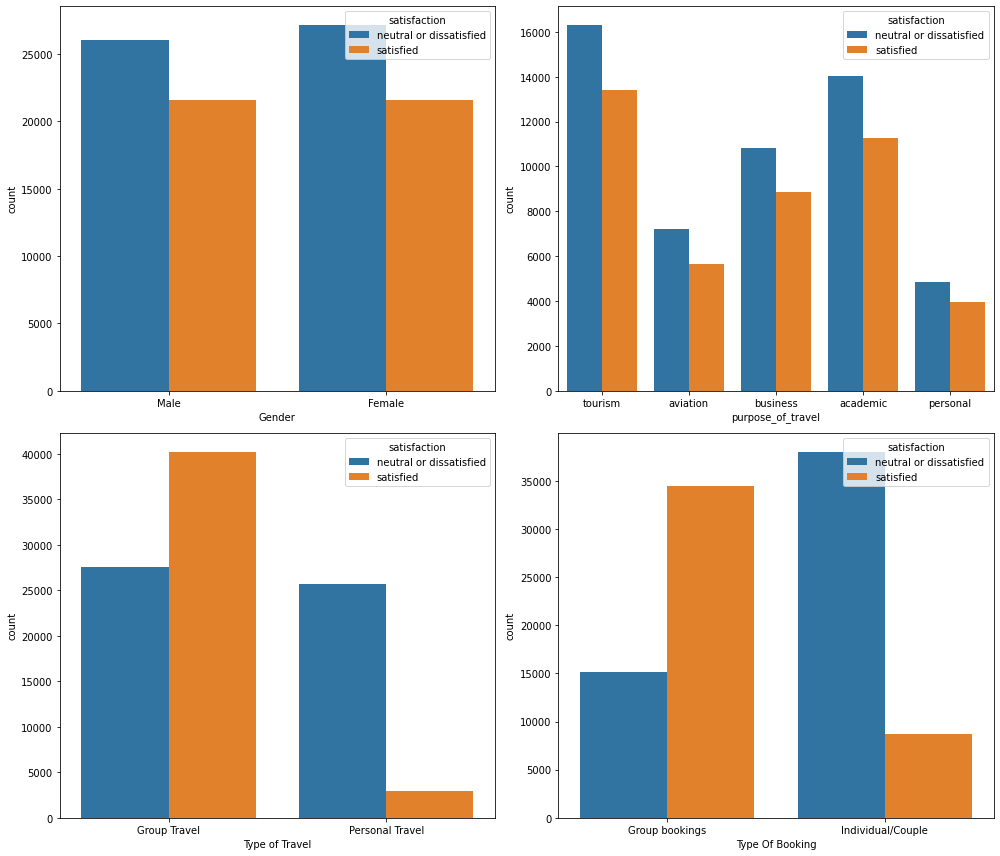

In [15]:
# sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
plt.tight_layout();

Based on the above visualization we can conclude:

1. In the Gender column, the number of Satisfied and Dissatisfied is almost the same
2. In the purpose of travel column, the highest number of Satisfied and Dissatisfied is in the type of tourism trip. This can be due to the fact that travel in terms of tourism is the most numerous compared to others.
3. In the type of travel column, the level of satisfaction is high for group-type trips, which is around 40k while on personal trips it is only around 2500
4. In the type of booking column, the level of satisfaction is high at the level of group bookings, which is around 34k, it is directly proportional to the type of group travel, while for individual/couple booking types that satisfy only about 9000, it is also directly proportional to the type of personal travel.

## Breakdown Categorical data for each feature

### Gender

In [16]:
def df_countplot(df, target):
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    ax1 = sns.countplot( x = target, data = df,  ax=axes[0])

    counts = df.groupby([target, 'satisfaction']).size().to_frame('Total')
    counts = counts.reset_index()
    ax2 = sns.barplot(data=counts, y='Total', x=target, hue='satisfaction', ax=axes[1])
    plt.show()
#     return ax1

def pivot_satisfaction(df,target):
  df_rate = pd.pivot_table(
      df[['id',target,'satisfaction']],
      index       =[target],
      columns     =['satisfaction'],
      aggfunc     ="count",
      fill_value  =0,
  ).reset_index()

  df_rate.columns=[target,'neutral or dissatisfied','satisfied']

  df_rate['total'] = df_rate['neutral or dissatisfied'] + df_rate['satisfied']
  df_rate["satisfaction Rate"] = round((df_rate['satisfied']/df_rate['total'])*100,2)
  df_rate["dissatisfied Rate"] = round((df_rate['neutral or dissatisfied']/df_rate['total'])*100,2)
  return df_rate

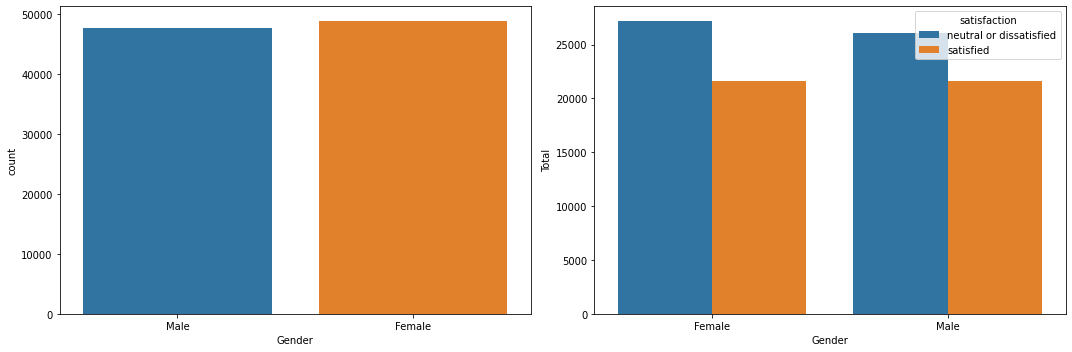

In [17]:
df_countplot(df,"Gender")

In [18]:
pivot_satisfaction(df,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Female,27181,21604,48785,44.28,55.72
1,Male,26048,21577,47625,45.31,54.69


We see that the levels of "satisfied" and "dissatisfied" in gender "Female" and "Male" are relatively balanced, namely 44.28% : 45.30% and 55.71% : 54.69% . Here we see that "Male" is slightly more satisfied with hotel services than "Female"

### Purpose of Travel

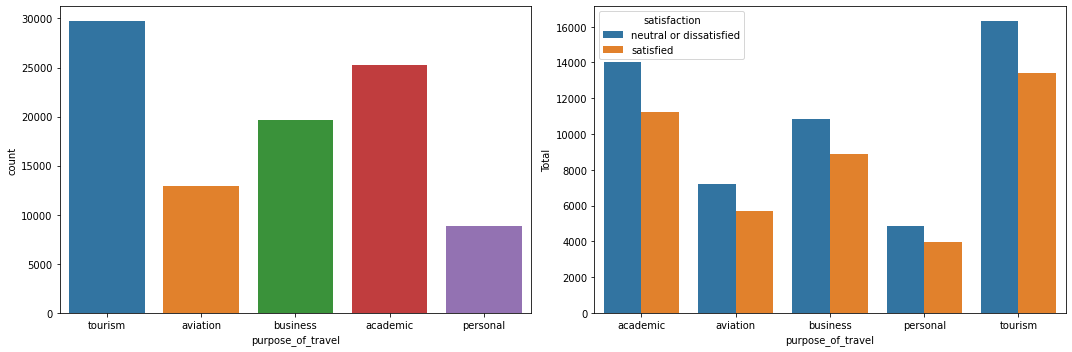

In [19]:
df_countplot(df,"purpose_of_travel")

In [20]:
pivot_satisfaction(df,"purpose_of_travel")

,purpose_of_travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,academic,14033,11256,25289,44.51,55.49
1,aviation,7211,5671,12882,44.02,55.98
2,business,10820,8856,19676,45.01,54.99
3,personal,4845,3975,8820,45.07,54.93
4,tourism,16320,13423,29743,45.13,54.87


In the graph above, it is clear that the level of satisfaction of the "tourism" travel destination is high, although the level of dissatisfaction is also high. However, if we look in detail, the satisfaction level of each travel destination is relatively balanced, namely at 44-45% with the highest "tourism". At the level of "neutral or dissatisfied" the highest rating by "Aviation" with 55.97%. However, in general, the rates for each travel destination are almost the same.

### Type of Travel

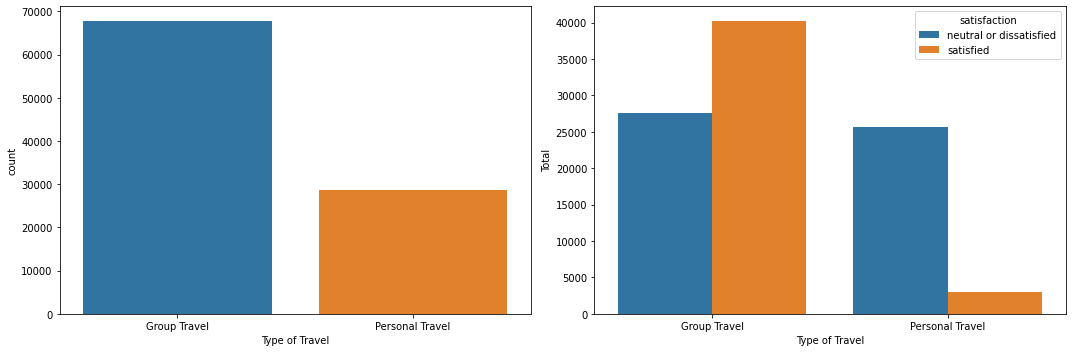

In [21]:
df_countplot(df,"Type of Travel")

In [22]:
pivot_satisfaction(df,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Group Travel,27549,40216,67765,59.35,40.65
1,Personal Travel,25680,2965,28645,10.35,89.65


If you look at the graph, there are interesting things here. That for a "Group Travel" type of trip, the "Satisfaction" level is quite high, namely 59.34%, inversely proportional to the "Personal Travel" type of trip. Even "Personal Travel" gets a very high "neutral or dissatisfied" rate of 89.64%. It can be concluded that this hotel is more intended for the benefit of "Group Travel".

### Type of Booking

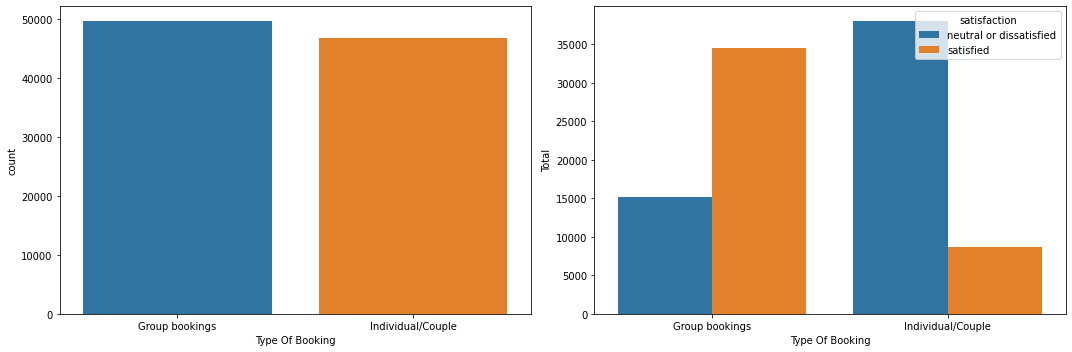

In [23]:
df_countplot(df,"Type Of Booking")

In [24]:
pivot_satisfaction(df,"Type Of Booking")

,Type Of Booking,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Group bookings,15185,34480,49665,69.43,30.57
1,Individual/Couple,38044,8701,46745,18.61,81.39


The same thing we see in "Type Of Booking" which is directly proportional to "Type of Travel". Of course, if the "Type of Travel" is "Group Travel" then the "Type of Booking" is also the "Group Booking" type. The satisfaction rate for "Group Booking" reached 69.42% compared to "Individual/Couple". Here we can get an insight that the "Type of Booking" for "Couple" then most likely the "Type of Travel" that is taken is "Group Travel" (More than 1). That factor is why the level of "neutral or dissatisfied" in the "Type of Travel" type "Group Travel" is quite high.

## Numeric data visualization

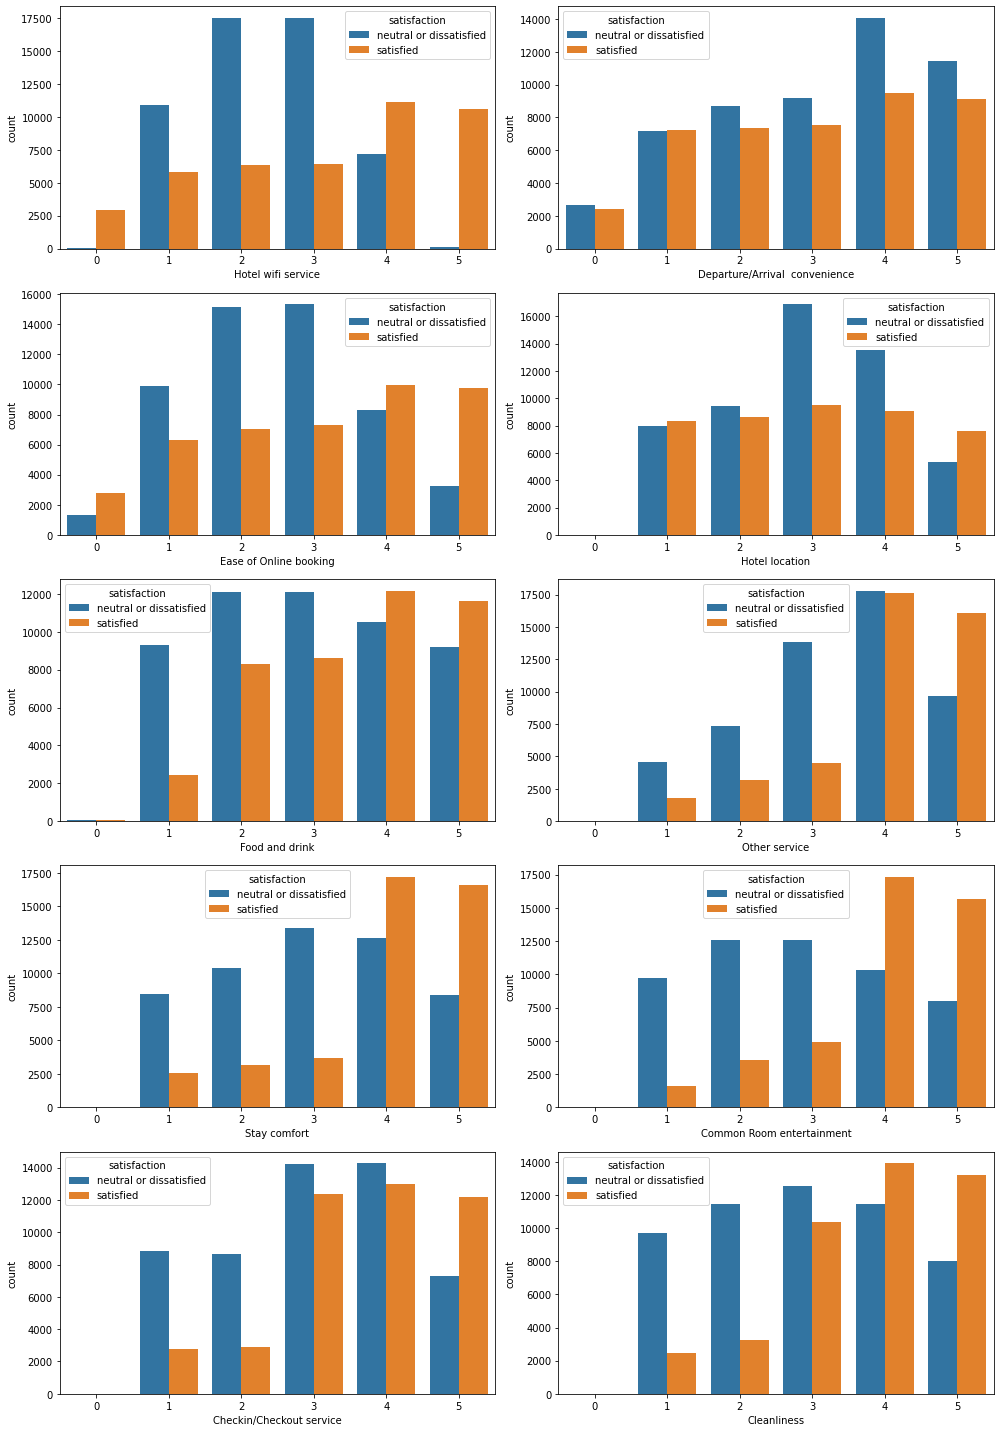

In [25]:
fig, ax = plt.subplots(5,2, figsize=(14, 20))
sns.countplot(data=df, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Hotel location', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='Food and drink', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df, x='Other service', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df, x='Stay comfort', hue='satisfaction', ax=ax[3][0])
sns.countplot(data=df, x='Common Room entertainment', hue='satisfaction', ax=ax[3][1])
sns.countplot(data=df, x='Checkin/Checkout service', hue='satisfaction', ax=ax[4][0])
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', ax=ax[4][1])
plt.tight_layout();

If we look more closely by assuming a score of 0-3 is dissatisfied and 4-5 is satisfied, we can see from this visualization that there are several high dissatisfied scores. We will take only the top 3, namely:

1. Hotel wifi service
2. Common room Entertainment
3. Stay Comfort

### Age

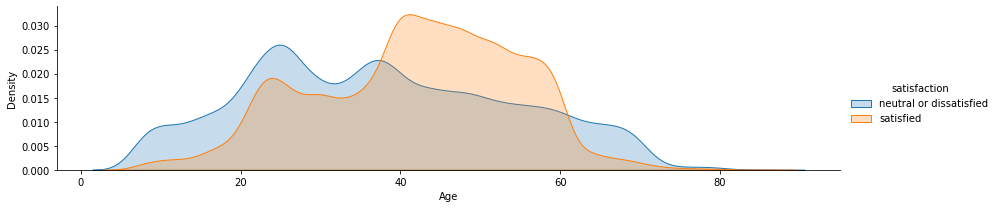

<AxesSubplot:xlabel='Age', ylabel='Count'>

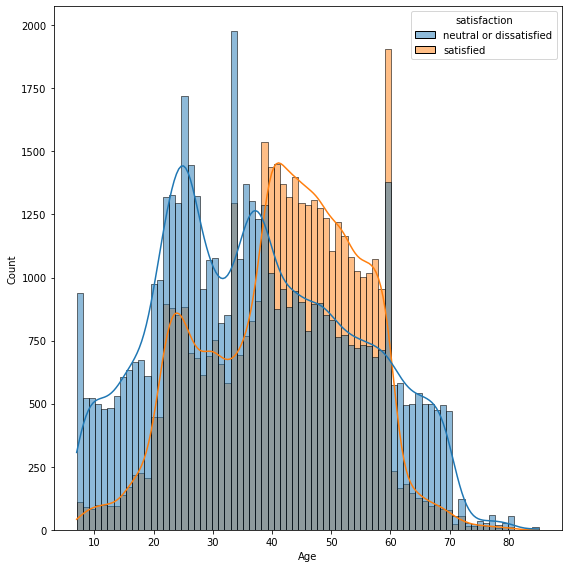

In [26]:
facet = sns.FacetGrid(df, hue = 'satisfaction', aspect = 4)
facet.map(sns.kdeplot, "Age", shade= True)
facet.add_legend()
plt.show()

plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = df, x = "Age", kde = True, hue = "satisfaction")

It can be seen that the highest level of satisfaction is in the range of 40-60 while under the age of 40 the average level of satisfaction is dissatisfied and also over the age of 60 feel dissatisfied.

In [27]:
def age_group(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"
  
df['age_group'] = df['Age'].apply(lambda age: age_group(age))

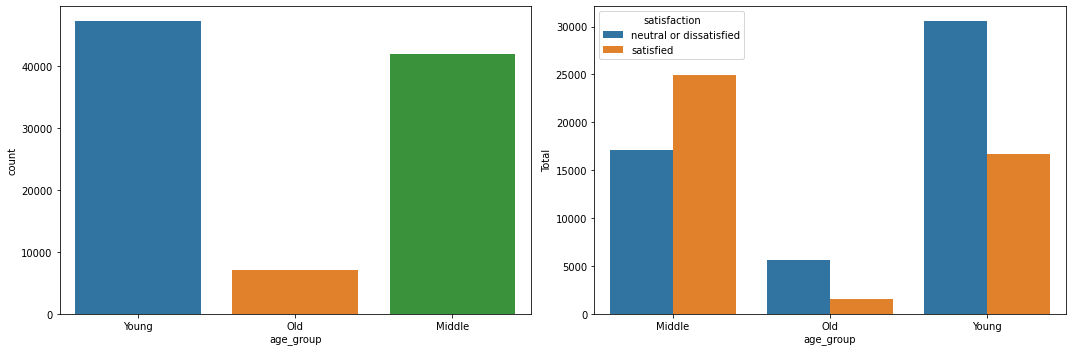

In [28]:
df_countplot(df,"age_group")

In [29]:
pivot_satisfaction(df,"age_group")

,age_group,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Middle,17073,24931,42004,59.35,40.65
1,Old,5583,1516,7099,21.36,78.64
2,Young,30573,16734,47307,35.37,64.63


Next we will focus more on data where other than age_group which is not 'Middle' because there is an opputunity how we can improve our service

In [30]:
df_not_mid_age = df[df['age_group'] != 'Middle']
df_not_mid_age.shape

(54406, 18)

#### Age and hotel wife service

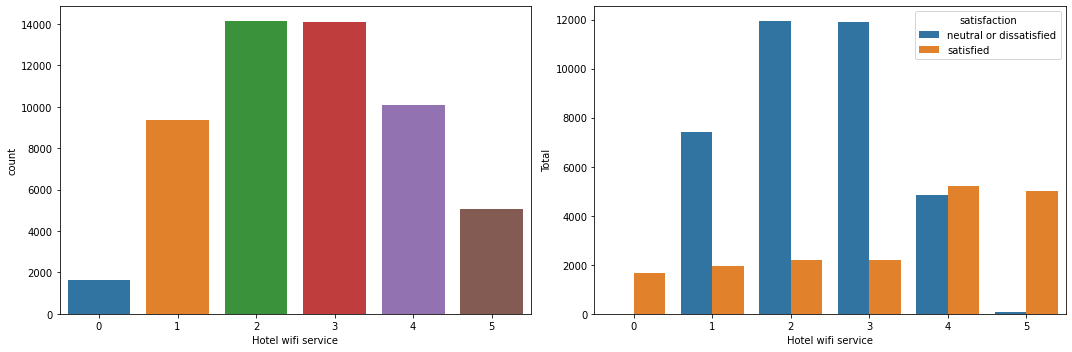

In [31]:
df_countplot(df_not_mid_age,"Hotel wifi service")

In [32]:
pivot_satisfaction(df_not_mid_age,"Hotel wifi service")

,Hotel wifi service,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,3,1647,1650,99.82,0.18
1,1,7399,1967,9366,21.00,79.00
2,2,11942,2202,14144,15.57,84.43
3,3,11888,2204,14092,15.64,84.36
4,4,4860,5214,10074,51.76,48.24
5,5,64,5016,5080,98.74,1.26


#### Age and common room entertaiment

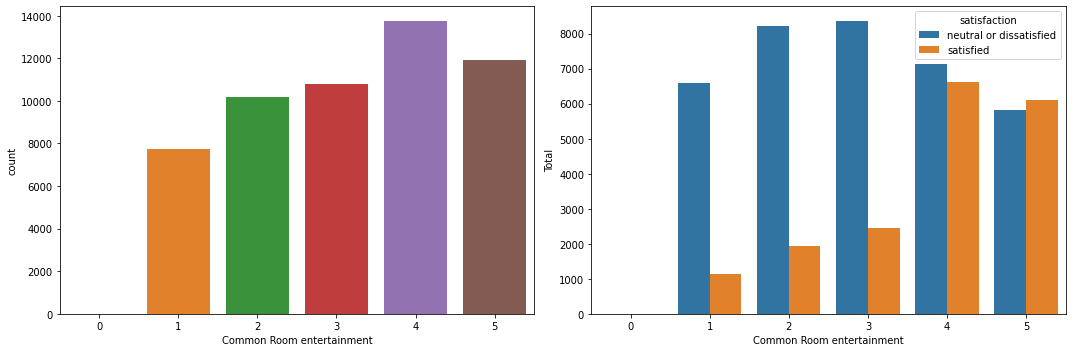

In [33]:
df_countplot(df_not_mid_age,"Common Room entertainment")

In [34]:
pivot_satisfaction(df_not_mid_age,"Common Room entertainment")

,Common Room entertainment,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,6,0,6,0.00,100.00
1,1,6597,1141,7738,14.75,85.25
2,2,8226,1945,10171,19.12,80.88
3,3,8360,2456,10816,22.71,77.29
4,4,7143,6608,13751,48.05,51.95
5,5,5824,6100,11924,51.16,48.84


#### Age and stay comfort

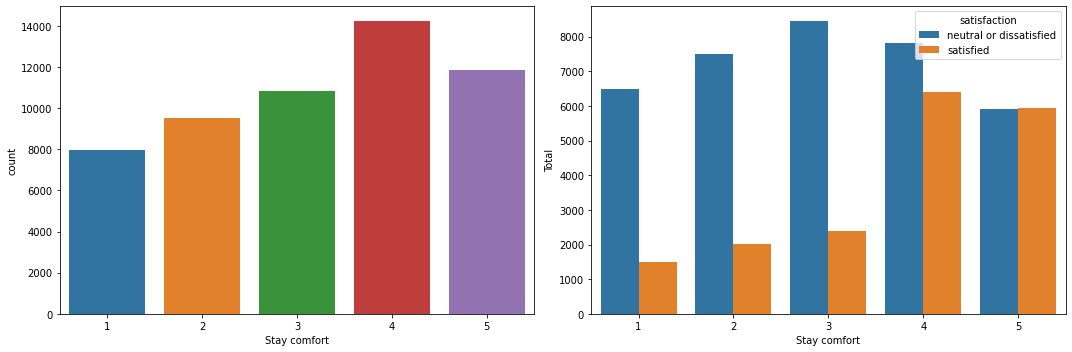

In [35]:
df_countplot(df_not_mid_age,"Stay comfort")

In [36]:
pivot_satisfaction(df_not_mid_age,"Stay comfort")

,Stay comfort,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,1,6478,1485,7963,18.65,81.35
1,2,7506,2021,9527,21.21,78.79
2,3,8450,2383,10833,22.00,78.00
3,4,7817,6415,14232,45.07,54.93
4,5,5905,5946,11851,50.17,49.83


# Preprocessing data

## Encode data

### One hot encode

In [37]:
def one_hot_encode (df_,variable,top_x_labels):
  for label in top_x_labels:
    df_[variable + '_' + label] = np.where(df[variable]==label,1,0)

# Purpose_of_travel
one_hot = [x for x in df['purpose_of_travel'].value_counts().sort_values(ascending=False).head().index]
one_hot_encode(df,'purpose_of_travel',one_hot)
df = df.drop(['purpose_of_travel'], axis=1)

# Type_of_travel
one_hot = [x for x in df['Type of Travel'].value_counts().sort_values(ascending=False).head().index]
one_hot_encode(df,'Type of Travel',one_hot)
df = df.drop(['Type of Travel'], axis=1)

# Type_of_booking
one_hot = [x for x in df['Type Of Booking'].value_counts().sort_values(ascending=False).head().index]
one_hot_encode(df,'Type Of Booking',one_hot)
df = df.drop(['Type Of Booking'], axis=1)

df = df.drop(['age_group'], axis=1)


df.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,Male,25,3,2,3,3,1,1,1,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
1,110028,Female,26,2,2,2,2,5,5,5,...,satisfied,1,0,0,0,0,1,0,1,0
2,24026,Female,25,2,5,5,5,2,2,2,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
3,119299,Male,61,3,3,3,3,4,5,3,...,satisfied,0,0,0,1,0,1,0,1,0
4,111157,Female,26,3,4,2,1,1,1,1,...,neutral or dissatisfied,0,0,1,0,0,0,1,0,1


### Label encoder

In [38]:
# first step
from sklearn.preprocessing import LabelEncoder
df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])

# second step
df['Gender'] = df['Gender'].replace('Female',0)
df['Gender'] = df['Gender'].replace('Male',1)
df['Gender'] = df['Gender'].astype('int')

In [39]:
df[['Gender','satisfaction']]

,Gender,satisfaction
0,1,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
96405,0,0
96406,1,1
96407,1,0
96408,0,0


<AxesSubplot:>

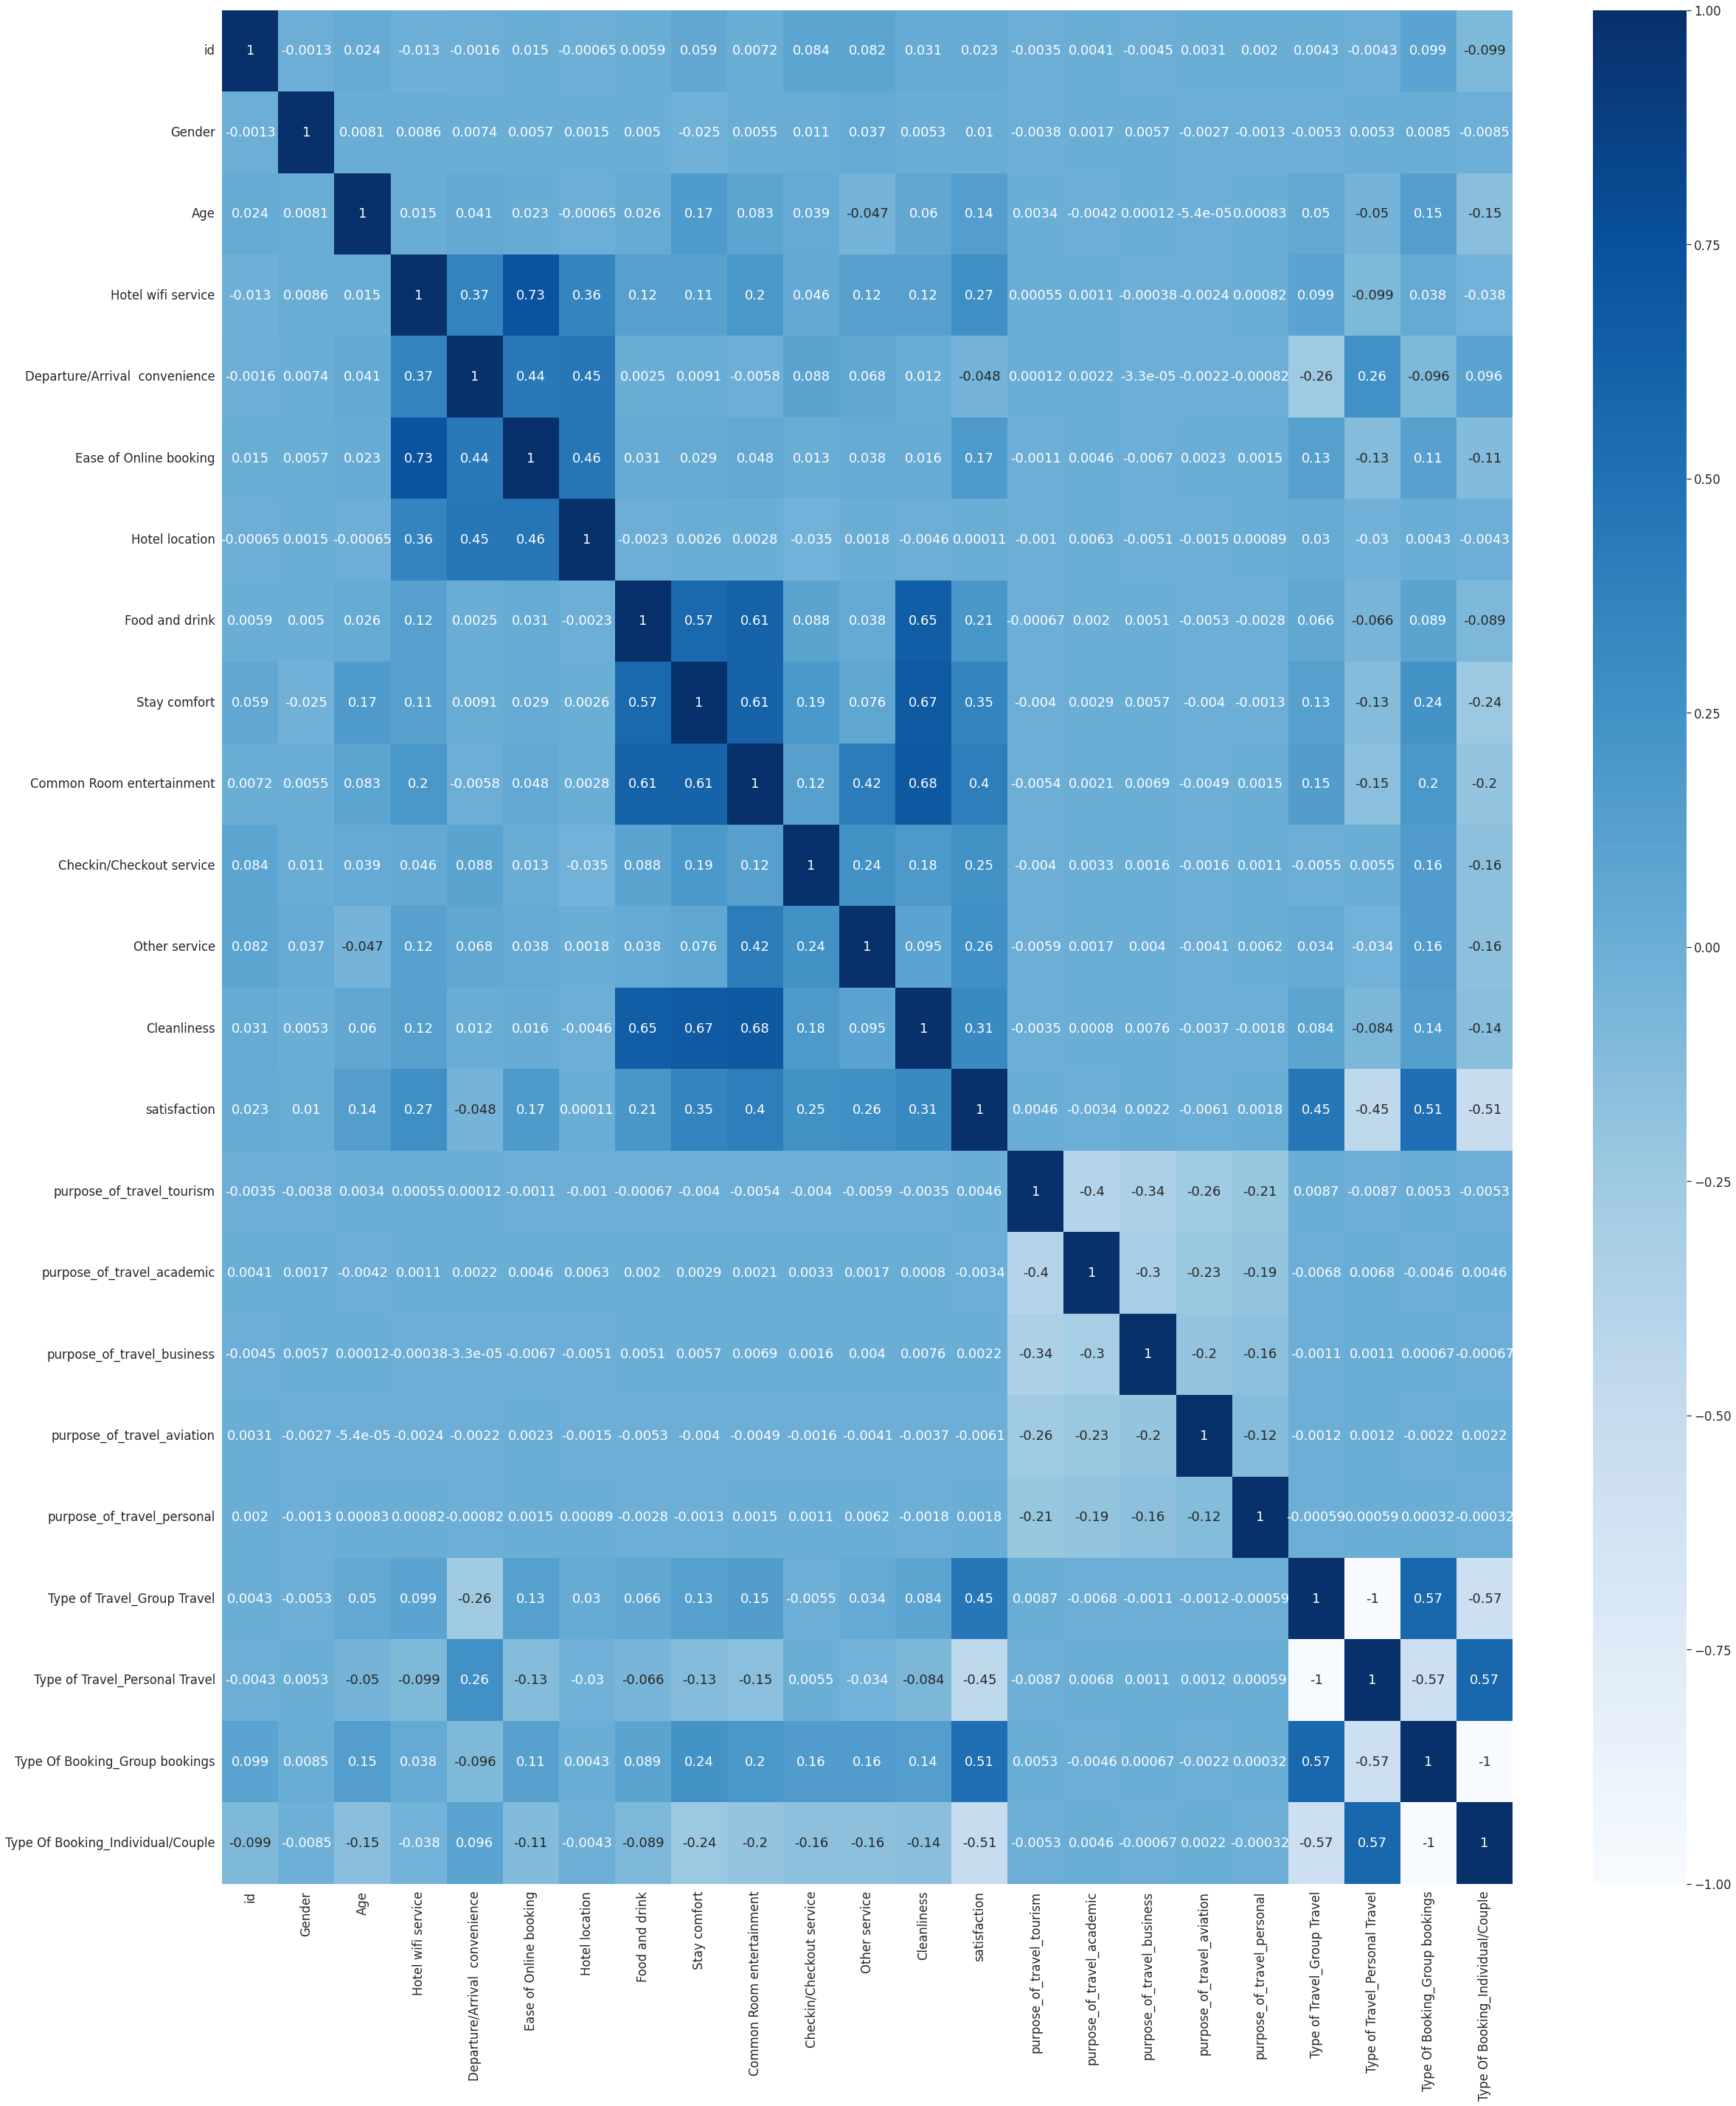

In [40]:
# Create correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(35,40))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, annot=True, cmap='Blues',fmt='.2g' )

<AxesSubplot:>

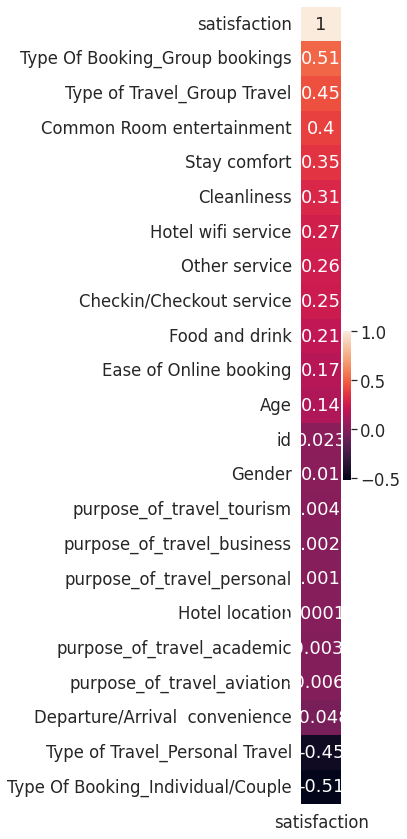

In [41]:
plt.figure(figsize=(6,12))
sns.heatmap(corr_matrix[['satisfaction']].sort_values(by=['satisfaction'],ascending=False,),annot=True)

# Modeling

In [42]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

# Train-Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import cross_val_score, learning_curve

In [43]:
y= df['satisfaction']
X= df.drop(['satisfaction'],1)

In [44]:
X.shape,y.shape

((96410, 22), (96410,))

In [45]:
X.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,Cleanliness,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,1,25,3,2,3,3,1,1,1,...,1,1,0,0,0,0,1,0,1,0
1,110028,0,26,2,2,2,2,5,5,5,...,5,1,0,0,0,0,1,0,1,0
2,24026,0,25,2,5,5,5,2,2,2,...,2,1,0,0,0,0,1,0,1,0
3,119299,1,61,3,3,3,3,4,5,3,...,3,0,0,0,1,0,1,0,1,0
4,111157,0,26,3,4,2,1,1,1,1,...,1,0,0,1,0,0,0,1,0,1


In [46]:
y

0        0
1        1
2        0
3        1
4        0
        ..
96405    0
96406    1
96407    0
96408    0
96409    0
Name: satisfaction, Length: 96410, dtype: int64

In [47]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = model_type()
        model.fit(X_train_scaled,y_train)
        y_pred=model.predict(X_test_scaled)
        
        AccTrain.append(model.score(X_train_scaled , y_train))
        AccTest.append(model.score(X_test_scaled , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))



----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9248003319157764], 1 of KFold 5
DecisionTreeClassifier Recall: [0.916049096804076], 1 of KFold 5
DecisionTreeClassifier Precission: [0.916049096804076], 1 of KFold 5
DecisionTreeClassifier AUC: [0.923974200853663], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9248003319157764], 2 of KFold 5
DecisionTreeClassifier Recall: [0.916049096804076], 2 of KFold 5
DecisionTreeClassifier Precission: [0.916049096804076], 2 of KFold 5
DecisionTreeClassifier AUC: [0.9239742

In [48]:
# Compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
9,XGBClassifier,0.965948,0.953387,0.956119,0.939024,0.952031,1.256094e-02
6,RandomForestClassifier,0.999992,0.950545,0.954457,0.934161,0.948998,4.944767e-02
8,ExtraTreesClassifier,1.000000,0.946634,0.949982,0.929807,0.945046,5.336583e-02
7,GradientBoostingClassifier,0.929087,0.928638,0.919538,0.921285,0.927944,4.486049e-04
0,DecisionTreeClassifier,1.000000,0.924282,0.914342,0.916838,0.923579,7.571829e-02
3,GaussianNB,0.800591,0.800591,0.755761,0.819736,0.802398,2.220446e-16
5,LinearSVC,0.698073,0.696608,0.684571,0.735737,0.700298,1.465097e-03
2,KNeighborsClassifier,0.791134,0.680417,0.643076,0.643917,0.676972,1.107172e-01
1,LogisticRegression,0.552111,0.552111,0.000000,0.000000,0.500000,0.000000e+00
4,SVC,0.552111,0.552111,0.000000,0.000000,0.500000,0.000000e+00


We choose the XGBClassifier model because the results of the test and training are not much different

# Train Model

In [49]:
model = XGBClassifier().fit(X_train_scaled,y_train)

# data training
y_pred=model.predict(X_train_scaled)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     42584
           1       0.97      0.96      0.96     34544

    accuracy                           0.97     77128
   macro avg       0.97      0.97      0.97     77128
weighted avg       0.97      0.97      0.97     77128



In [50]:
# data tes
y_pred_test = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10645
           1       0.95      0.94      0.95      8637

    accuracy                           0.95     19282
   macro avg       0.95      0.95      0.95     19282
weighted avg       0.95      0.95      0.95     19282



# Confusion Matrix

Confusion Matrix: [[10249   534]
 [  396  8103]]


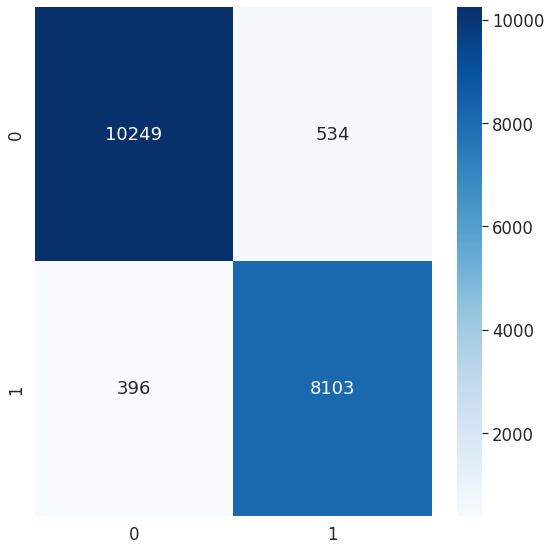

In [51]:
cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues");

# Feature Importance

We want to see Feature Importance from the machine learning results that we choose

In [52]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
feature_scores

Type Of Booking_Group bookings       0.360779
Hotel wifi service                   0.204176
Common Room entertainment            0.129769
Type of Travel_Group Travel          0.081106
Stay comfort                         0.056341
Hotel location                       0.029465
Checkin/Checkout service             0.025291
Cleanliness                          0.024528
Other service                        0.019569
Departure/Arrival  convenience       0.014354
Ease of Online booking               0.011801
Age                                  0.010521
id                                   0.007404
Food and drink                       0.006880
purpose_of_travel_personal           0.004003
purpose_of_travel_aviation           0.003128
purpose_of_travel_academic           0.002910
purpose_of_travel_tourism            0.002894
purpose_of_travel_business           0.002559
Gender                               0.002520
Type of Travel_Personal Travel       0.000000
Type Of Booking_Individual/Couple 

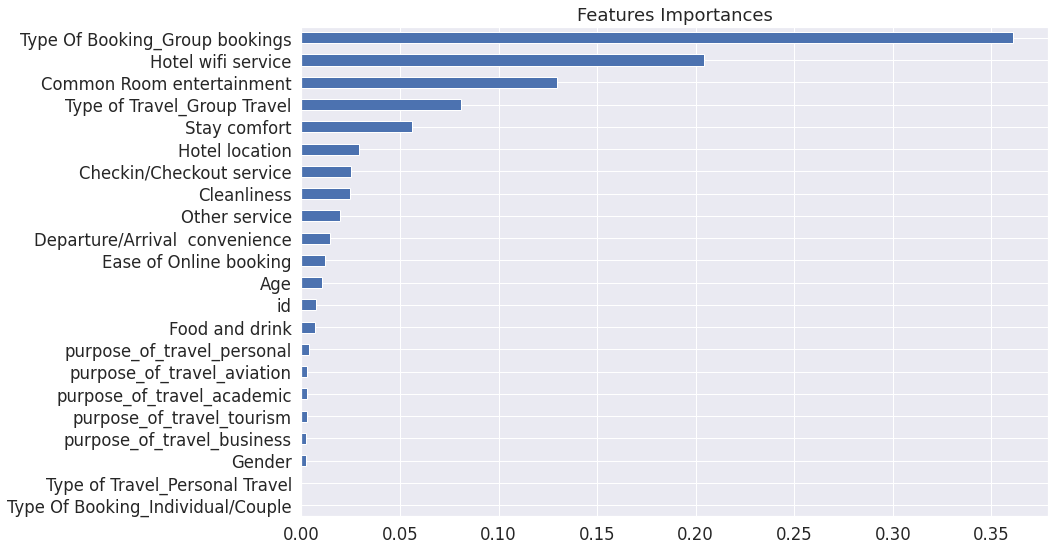

In [53]:
importances = pd.Series(data=model.feature_importances_,
                        index= X_train_scaled.columns)

importances_sorted = importances.sort_values()
plt.figure(figsize=(15,8))
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()

# Conclusion

Based on the Insights we got:

- There are 5 characteristics of customers who have the potential to be “neutral or dissatisfied” with the service, namely customers with gender “female”, purpose of travel “tourism”, type of travel “Group Travel”, type of booking “Individual/Couple”, and Age “Young ” i.e. age < 40 years

- There are 3 most important service factors that significantly affect customer satisfaction, including Hotel Wifi Service, Common Room Entertainment, and Stay comfort.

So our strategy is to focus on these 3 main factors to be able to increase customer satisfaction ratings for hotel services, especially to customers who are potentially neutral/dissatisfied. In addition, our recommendation is to provide attractive promos for customers who book in the individual/couple category.

Based on the results of the data mining process to modeling & evaluation, we got the best model that can predict whether the customer is satisfied or neutral/dissatisfied with hotel services, namely the XGBoost Classifier (XGB) model. To choose the best model, our first focus is the training and test accuracy score which is the highest but not overfitting (because basically our dataset can be said to be balanced). In addition, we also pay attention to the highest precision score of 0.92 because we want to suppress the false positive value (a condition where the predicted results are "customers are satisfied" when in fact "customers are not satisfied").